# (Homework) Week 7 - DataScience Bootcamp Fall 2025

All solution cells are replaced with `# TODO` placeholders so you can fill them in.

**Name:** Daniel Adejumo \
**Email:** dxa239@nyu.edu

---

## Problem A: Bayesian Dice Game (Posterior Inference)

You are playing a dice game at a carnival. The operator has **three dice**, each with different biases for rolling a six:

| Die | P(6) | P(1–5) |
|-----|------|--------|
| A   | 0.10 | 0.90   |
| B   | 0.30 | 0.70   |
| C   | 0.60 | 0.40   |

Before each round, the operator secretly picks one die at random (each equally likely). He then rolls it **10 times** and tells you how many sixes appeared.

Your job is to infer which die was used using **Bayes’ Theorem**:

$$ P(Die|k) = \frac{P(k|Die)P(Die)}{\sum_{d} P(k|d)P(d)} $$

where $P(k|Die)$ follows a Binomial (n=10, p_i) distribution.

**Tasks:**
1. Simulate the experiment by picking a random die and rolling it 10 times.
2. Compute posterior probabilities for each die given observed sixes.
3. Plot likelihoods and posterior probabilities.
4. Evaluate inference accuracy over 100 rounds.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math

# Dice setup
dice_probs = {'A': 0.1, 'B': 0.3, 'C': 0.6}
dice_names = list(dice_probs.keys())
prior = np.array([1/3, 1/3, 1/3])  # Uniform prior
n_rolls = 10

# Compute binomial probability mass function
def binomial_prob(n, k, p):
    # Binomial PMF: C(n,k) * p^k * (1-p)^(n-k)
    return math.comb(n, k) * (p**k) * ((1 - p)**(n - k))

def simulate_round():
    # 1. Pick a die randomly
    true_die = np.random.choice(dice_names, p=prior)
    p_val = dice_probs[true_die]
    
    # 2. Roll it n times and count sixes
    # np.random.binomial gives number of successes in n trials
    k = np.random.binomial(n_rolls, p_val)
    return true_die, k

def posterior_given_k(k):
    # Calculate likelihood P(k | Die) for each die
    likelihoods = np.array([binomial_prob(n_rolls, k, dice_probs[d]) for d in dice_names])
    
    # Multiply by Prior P(Die)
    unnormalized_posterior = likelihoods * prior
    
    # Normalize by dividing by Evidence P(k)
    evidence = np.sum(unnormalized_posterior)
    
    # Handle edge case where evidence is 0 (shouldn't happen here with these probs)
    if evidence == 0:
        return prior
        
    return unnormalized_posterior / evidence

# Example run
true_die, k = simulate_round()
posterior = posterior_given_k(k)

print(f"Observed {k} sixes out of {n_rolls} rolls")
for die, p in zip(dice_names, posterior):
    print(f"P({die} | {k} sixes) = {p:.3f}")
print(f"True die: {true_die}")

Observed 4 sixes out of 10 rolls
P(A | 4 sixes) = 0.035
P(B | 4 sixes) = 0.620
P(C | 4 sixes) = 0.345
True die: B


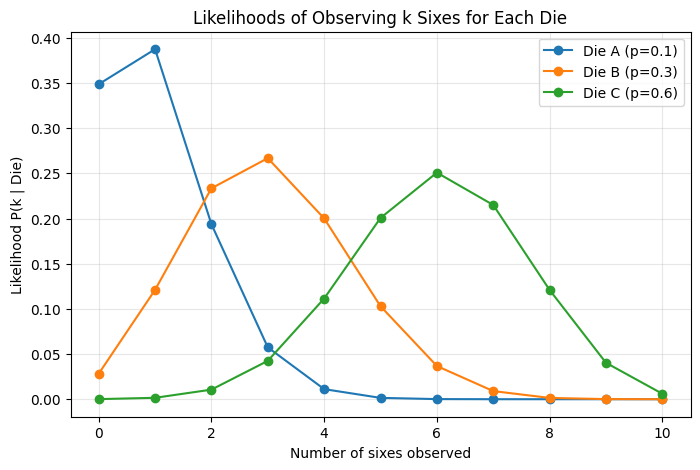

In [3]:
# Likelihood plot
ks = np.arange(0, 11)
plt.figure(figsize=(8,5))
for die, p in dice_probs.items():
    plt.plot(ks, [binomial_prob(n_rolls, k, p) for k in ks], marker='o', label=f"Die {die} (p={p})")
plt.xlabel('Number of sixes observed')
plt.ylabel('Likelihood P(k | Die)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.title('Likelihoods of Observing k Sixes for Each Die')
plt.show()

In [4]:
# Accuracy evaluation
num_trials = 100
correct = 0
for _ in range(num_trials):
    true_die, k = simulate_round()
    posterior = posterior_given_k(k)
    # Predict the die with highest posterior probability (MAP estimate)
    predicted_die = dice_names[np.argmax(posterior)]
    correct += (predicted_die == true_die)

print(f"Accuracy over {num_trials} rounds: {correct/num_trials:.2f}")

Accuracy over 100 rounds: 0.80


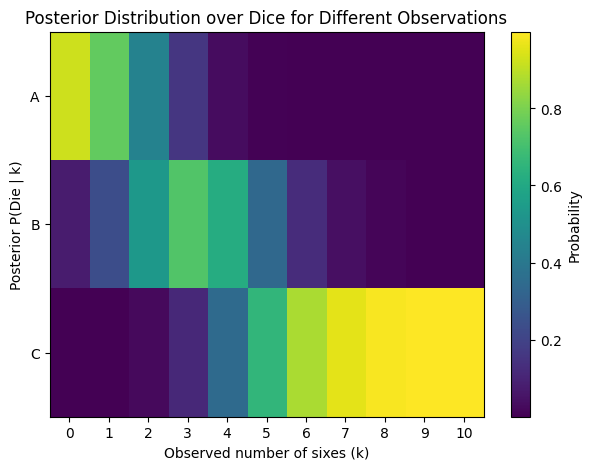

In [5]:
# Posterior visualizations
posterior_matrix = np.array([posterior_given_k(k) for k in ks])
plt.figure(figsize=(7,5))
plt.imshow(posterior_matrix.T, cmap='viridis', aspect='auto')
plt.xticks(ks)
plt.yticks(range(3), dice_names)
plt.xlabel('Observed number of sixes (k)')
plt.ylabel('Posterior P(Die | k)')
plt.colorbar(label='Probability')
plt.title('Posterior Distribution over Dice for Different Observations')
plt.show()

## Problem B: Linear Regression
Given x=[-2,-1,0,1,2] and y=[7,4,3,4,7]. Fit a linear model using the normal equation.

In [11]:
x = np.array([-2, -1, 0, 1, 2])
y = np.array([7, 4, 3, 4, 7])

# Add bias term (column of ones) to X
X = np.c_[np.ones(len(x)), x]

# Normal Equation: theta = (X^T * X)^(-1) * X^T * y
theta = np.linalg.inv(X.T @ X) @ X.T @ y

# Make predictions
y_pred = X @ theta

# Calculate MSE
mse_linear = np.mean((y - y_pred) ** 2)

print('Linear theta:', theta, 'MSE:', mse_linear)

Linear theta: [ 5.00000000e+00 -5.55111512e-17] MSE: 2.8


## Problem C: Gradient Descent
Minimize f(w)=5(w−11)^4. Perform steps with α=1/400 and α=1/4000000. (Print the first 5 steps and visualize)

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# Gradient Descent Function
def grad_descent_vals(w0, alpha, steps):
    w = w0
    history = [w]
    
    for i in range(steps):
        # Derivative of f(w) = 5(w-11)^4 is f'(w) = 20(w-11)^3
        grad = 20 * (w - 11)**3
        w = w - alpha * grad
        history.append(w)
        
    return np.array(history)

# Run for two learning rates
hist_140 = grad_descent_vals(13, 1/400, 200)
hist_180 = grad_descent_vals(13, 1/4000000, 200)

# Print first 5 steps
print("First 5 steps (alpha=1/400):", hist_140[:5])
print("\nFirst 5 steps (alpha=1/4e6):", hist_180[:5])


First 5 steps (alpha=1/400): [13.         12.6        12.3952     12.25940637 12.15952887]

First 5 steps (alpha=1/4e6): [13.         12.99996    12.99992    12.99988001 12.99984001]


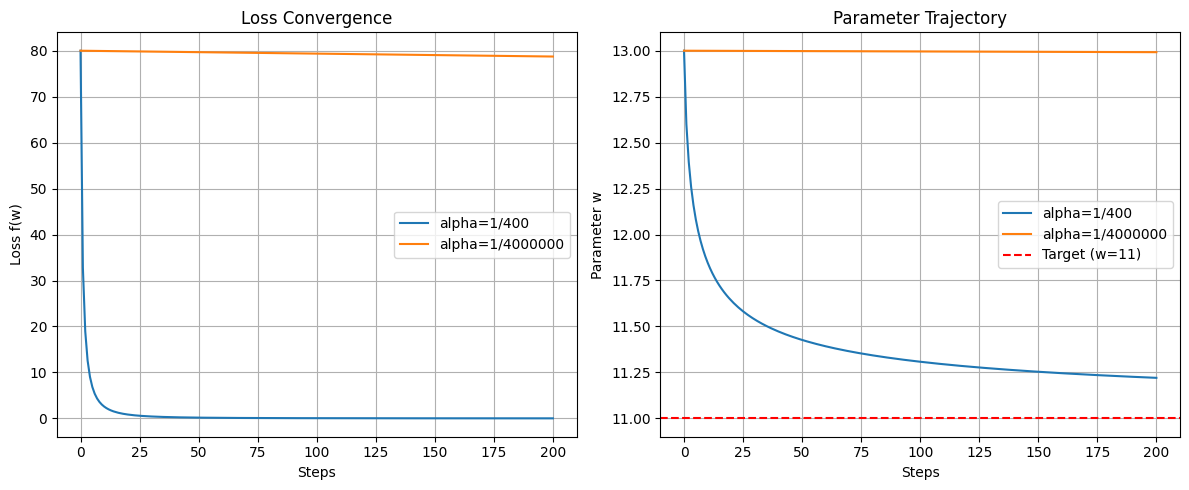

In [17]:
# Plotting
plt.figure(figsize=(12, 5))

# Subplot 1: Loss over time
plt.subplot(1, 2, 1)
loss_140 = 5 * (hist_140 - 11)**4
loss_180 = 5 * (hist_180 - 11)**4
plt.plot(loss_140, label='alpha=1/400')
plt.plot(loss_180, label='alpha=1/4000000')
plt.xlabel('Steps')
plt.ylabel('Loss f(w)')
plt.title('Loss Convergence')
plt.legend()
plt.grid(True)

# Subplot 2: Trajectory of w
plt.subplot(1, 2, 2)
plt.plot(hist_140, label='alpha=1/400')
plt.plot(hist_180, label='alpha=1/4000000')
plt.axhline(y=11, color='r', linestyle='--', label='Target (w=11)')
plt.xlabel('Steps')
plt.ylabel('Parameter w')
plt.title('Parameter Trajectory')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

ALL THE BEST!